In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [151]:
data = pd.read_csv('dataset_reformate.csv')

data

,pays,date,nombre_total,entree_mensuelle
0,Albanie,2014-02-01,1333,16.0
1,Allemagne,2014-02-01,306716,445.0
2,Andorre,2014-02-01,23,0.0
3,Autriche,2014-02-01,41225,-37.0
4,Bélarus,2014-02-01,1143,39.0
...,...,...,...,...
25795,Total Océanie,2024-10-01,4010,37.0
25796,Apatride,2024-10-01,1254,6.0
25797,Sans nationalité,2024-10-01,272,3.0
25798,Etat inconnu,2024-10-01,1089,2.0


In [152]:
pays = 'Serbie'

data['date'] = pd.to_datetime(data['date'])  # Conversion en datetime
germany_data = data[data['pays'] == pays].sort_values(by='date')
germany_data

,pays,date,nombre_total,entree_mensuelle
40,Serbie,2014-02-01,77531,-1096.0
240,Serbie,2014-03-01,76385,-1146.0
440,Serbie,2014-04-01,75390,-995.0
640,Serbie,2014-05-01,74141,-1249.0
840,Serbie,2014-06-01,73103,-1038.0
...,...,...,...,...
24840,Serbie,2024-06-01,56562,-128.0
25040,Serbie,2024-07-01,56488,-74.0
25240,Serbie,2024-08-01,56412,-76.0
25440,Serbie,2024-09-01,56262,-150.0


In [153]:
# Paramètres de séquences temporelles
sequence_length = 12*3  # Utiliser les 12 derniers mois pour prédire le suivant

# Extraire la variable cible
values = germany_data['entree_mensuelle'].values.reshape(-1, 1)

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_values = scaler.fit_transform(values)

# Créer les séquences temporelles
X, y = [], []
for i in range(len(normalized_values) - sequence_length):
    X.append(normalized_values[i:i + sequence_length])
    y.append(normalized_values[i + sequence_length])

X, y = np.array(X), np.array(y)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Formes des ensembles
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65, 36, 1), (28, 36, 1), (65, 1), (28, 1))

In [154]:
# Définir le modèle LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, verbose=1)

# Résultat de l'entraînement
history.history

c:\HES-SO\TSM-AnSeqDa\TSM-AnSeqDa\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - loss: 0.6099 - val_loss: 0.5137
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.5068 - val_loss: 0.4135
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.4091 - val_loss: 0.3195
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.3094 - val_loss: 0.2275
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2140 - val_loss: 0.1350
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1213 - val_loss: 0.0470
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0355 - val_loss: 0.0024
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0099 - val_loss: 0.0397
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0305 - val_loss: 0.0058
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0056 - val_loss: 0.0074
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0095 - val_l

{'loss': [0.6009219884872437,
  0.4939441978931427,
  0.3947840929031372,
  0.30056285858154297,
  0.2070596069097519,
  0.11347834765911102,
  0.030101658776402473,
  0.01396635826677084,
  0.026363909244537354,
  0.003225899301469326,
  0.0063940114341676235,
  0.008378999307751656,
  0.004634466487914324,
  0.002020979067310691,
  0.0027085081674158573,
  0.002561075147241354,
  0.0019511387217789888,
  0.00220906687900424,
  0.0023577380925416946,
  0.002027184469625354,
  0.001864982070401311,
  0.0018620789051055908,
  0.001862401026301086,
  0.001829333370551467,
  0.001859526033513248,
  0.0019682063721120358,
  0.0019212377956137061,
  0.0018380394903942943,
  0.0018371132900938392,
  0.0019120585639029741,
  0.001887800870463252,
  0.0018372838385403156,
  0.0018570218235254288,
  0.0018617751775309443,
  0.0018443523440510035,
  0.001845488091930747,
  0.0018380359979346395,
  0.0018573839915916324,
  0.0018689763965085149,
  0.001835778122767806,
  0.0019534737803041935,
  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


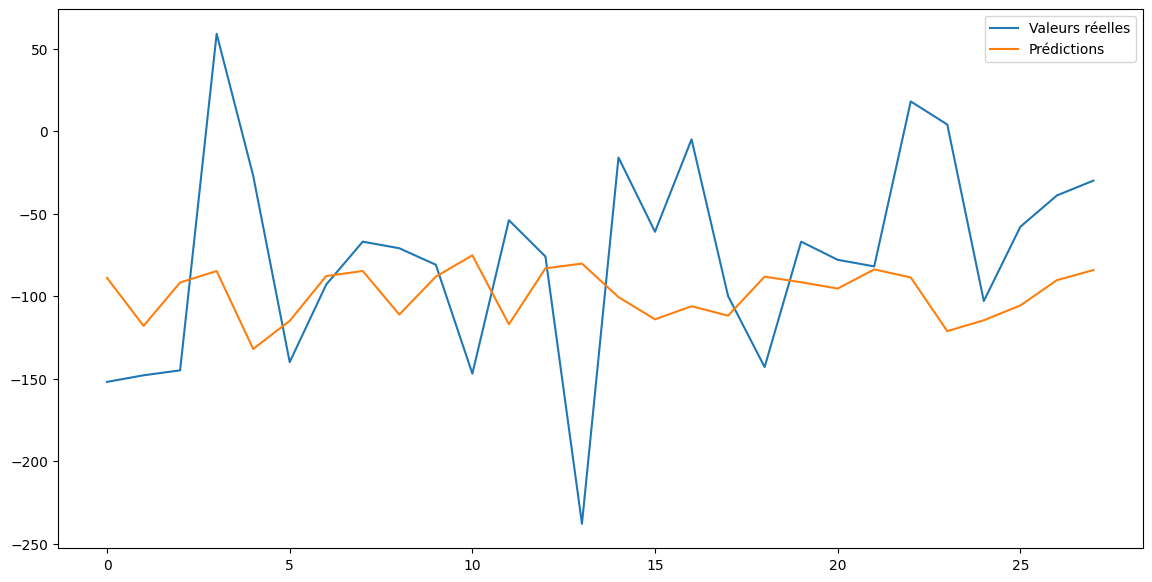

np.float64(4836.361079851106)

In [155]:
# Prédire les données de test
predicted_values = model.predict(X_test)

# Inverser la normalisation
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test)

# Visualiser les résultats
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Valeurs réelles')
plt.plot(predicted_values, label='Prédictions')
plt.legend()
plt.show()

# Calculer l'erreur quadratique moyenne
mse = np.mean(np.square(y_test - predicted_values))
mse

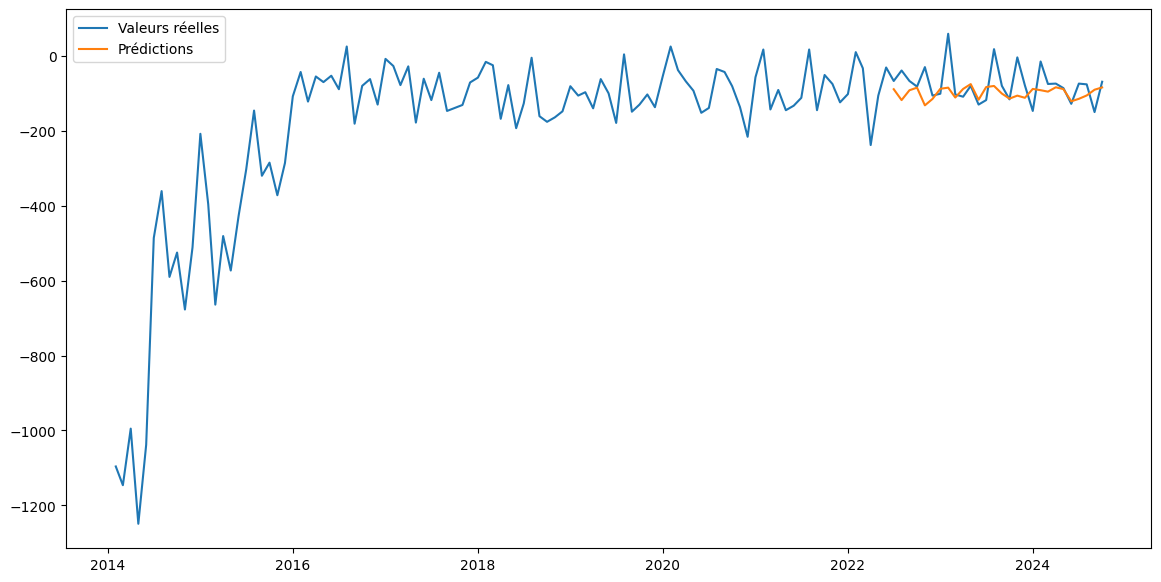

In [156]:
test = data[data['pays'] == pays].sort_values(by='date')

plt.figure(figsize=(14, 7))
plt.plot(test['date'], test['entree_mensuelle'], label='Valeurs réelles')
plt.plot(test['date'].iloc[-len(y_test):], predicted_values, label='Prédictions')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━

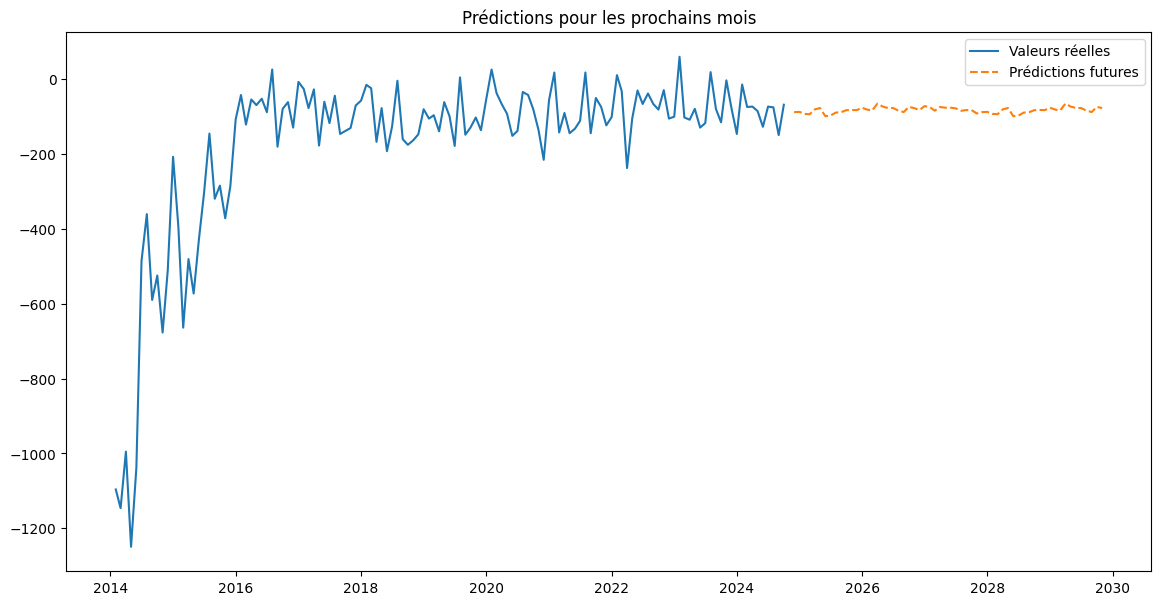

In [157]:
# Nombre de mois à prédire
n_months_to_predict = 12*5

# Dernière séquence des données d'entraînement
last_sequence = normalized_values[-sequence_length:].reshape(1, sequence_length, 1)

# Liste pour stocker les prédictions
future_predictions = []

for _ in range(n_months_to_predict):
    # Prédire le prochain mois
    next_value = model.predict(last_sequence)
    
    # Ajouter la prédiction à la liste
    future_predictions.append(next_value[0, 0])
    
    # Mettre à jour la séquence
    last_sequence = np.roll(last_sequence, -1, axis=1)

# Inverser la normalisation des prédictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Créer une plage de dates pour les prédictions futures
last_date = germany_data['date'].max()
future_dates = pd.date_range(start=last_date, periods=n_months_to_predict + 1, freq='ME')[1:]

# Visualiser les prédictions futures
plt.figure(figsize=(14, 7))
plt.plot(germany_data['date'], germany_data['entree_mensuelle'], label='Valeurs réelles')
plt.plot(future_dates, future_predictions, label='Prédictions futures', linestyle='--')
plt.legend()
plt.title('Prédictions pour les prochains mois')
plt.show()